In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree

In [2]:
data=pd.read_csv("Company_Data.csv")

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
from sklearn import preprocessing

In [5]:
le = preprocessing.LabelEncoder()

In [6]:
data["ShelveLoc"]=le.fit_transform(data["ShelveLoc"])
data["Urban"]=le.fit_transform(data["Urban"])
data["US"]=le.fit_transform(data["US"])

In [7]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [9]:
data=data.assign(Sale=pd.cut(data['Sales'], 
                               bins=[ 0, 4, 9,15], 
                               labels=['Low', 'Medium', 'High']))

In [10]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Medium


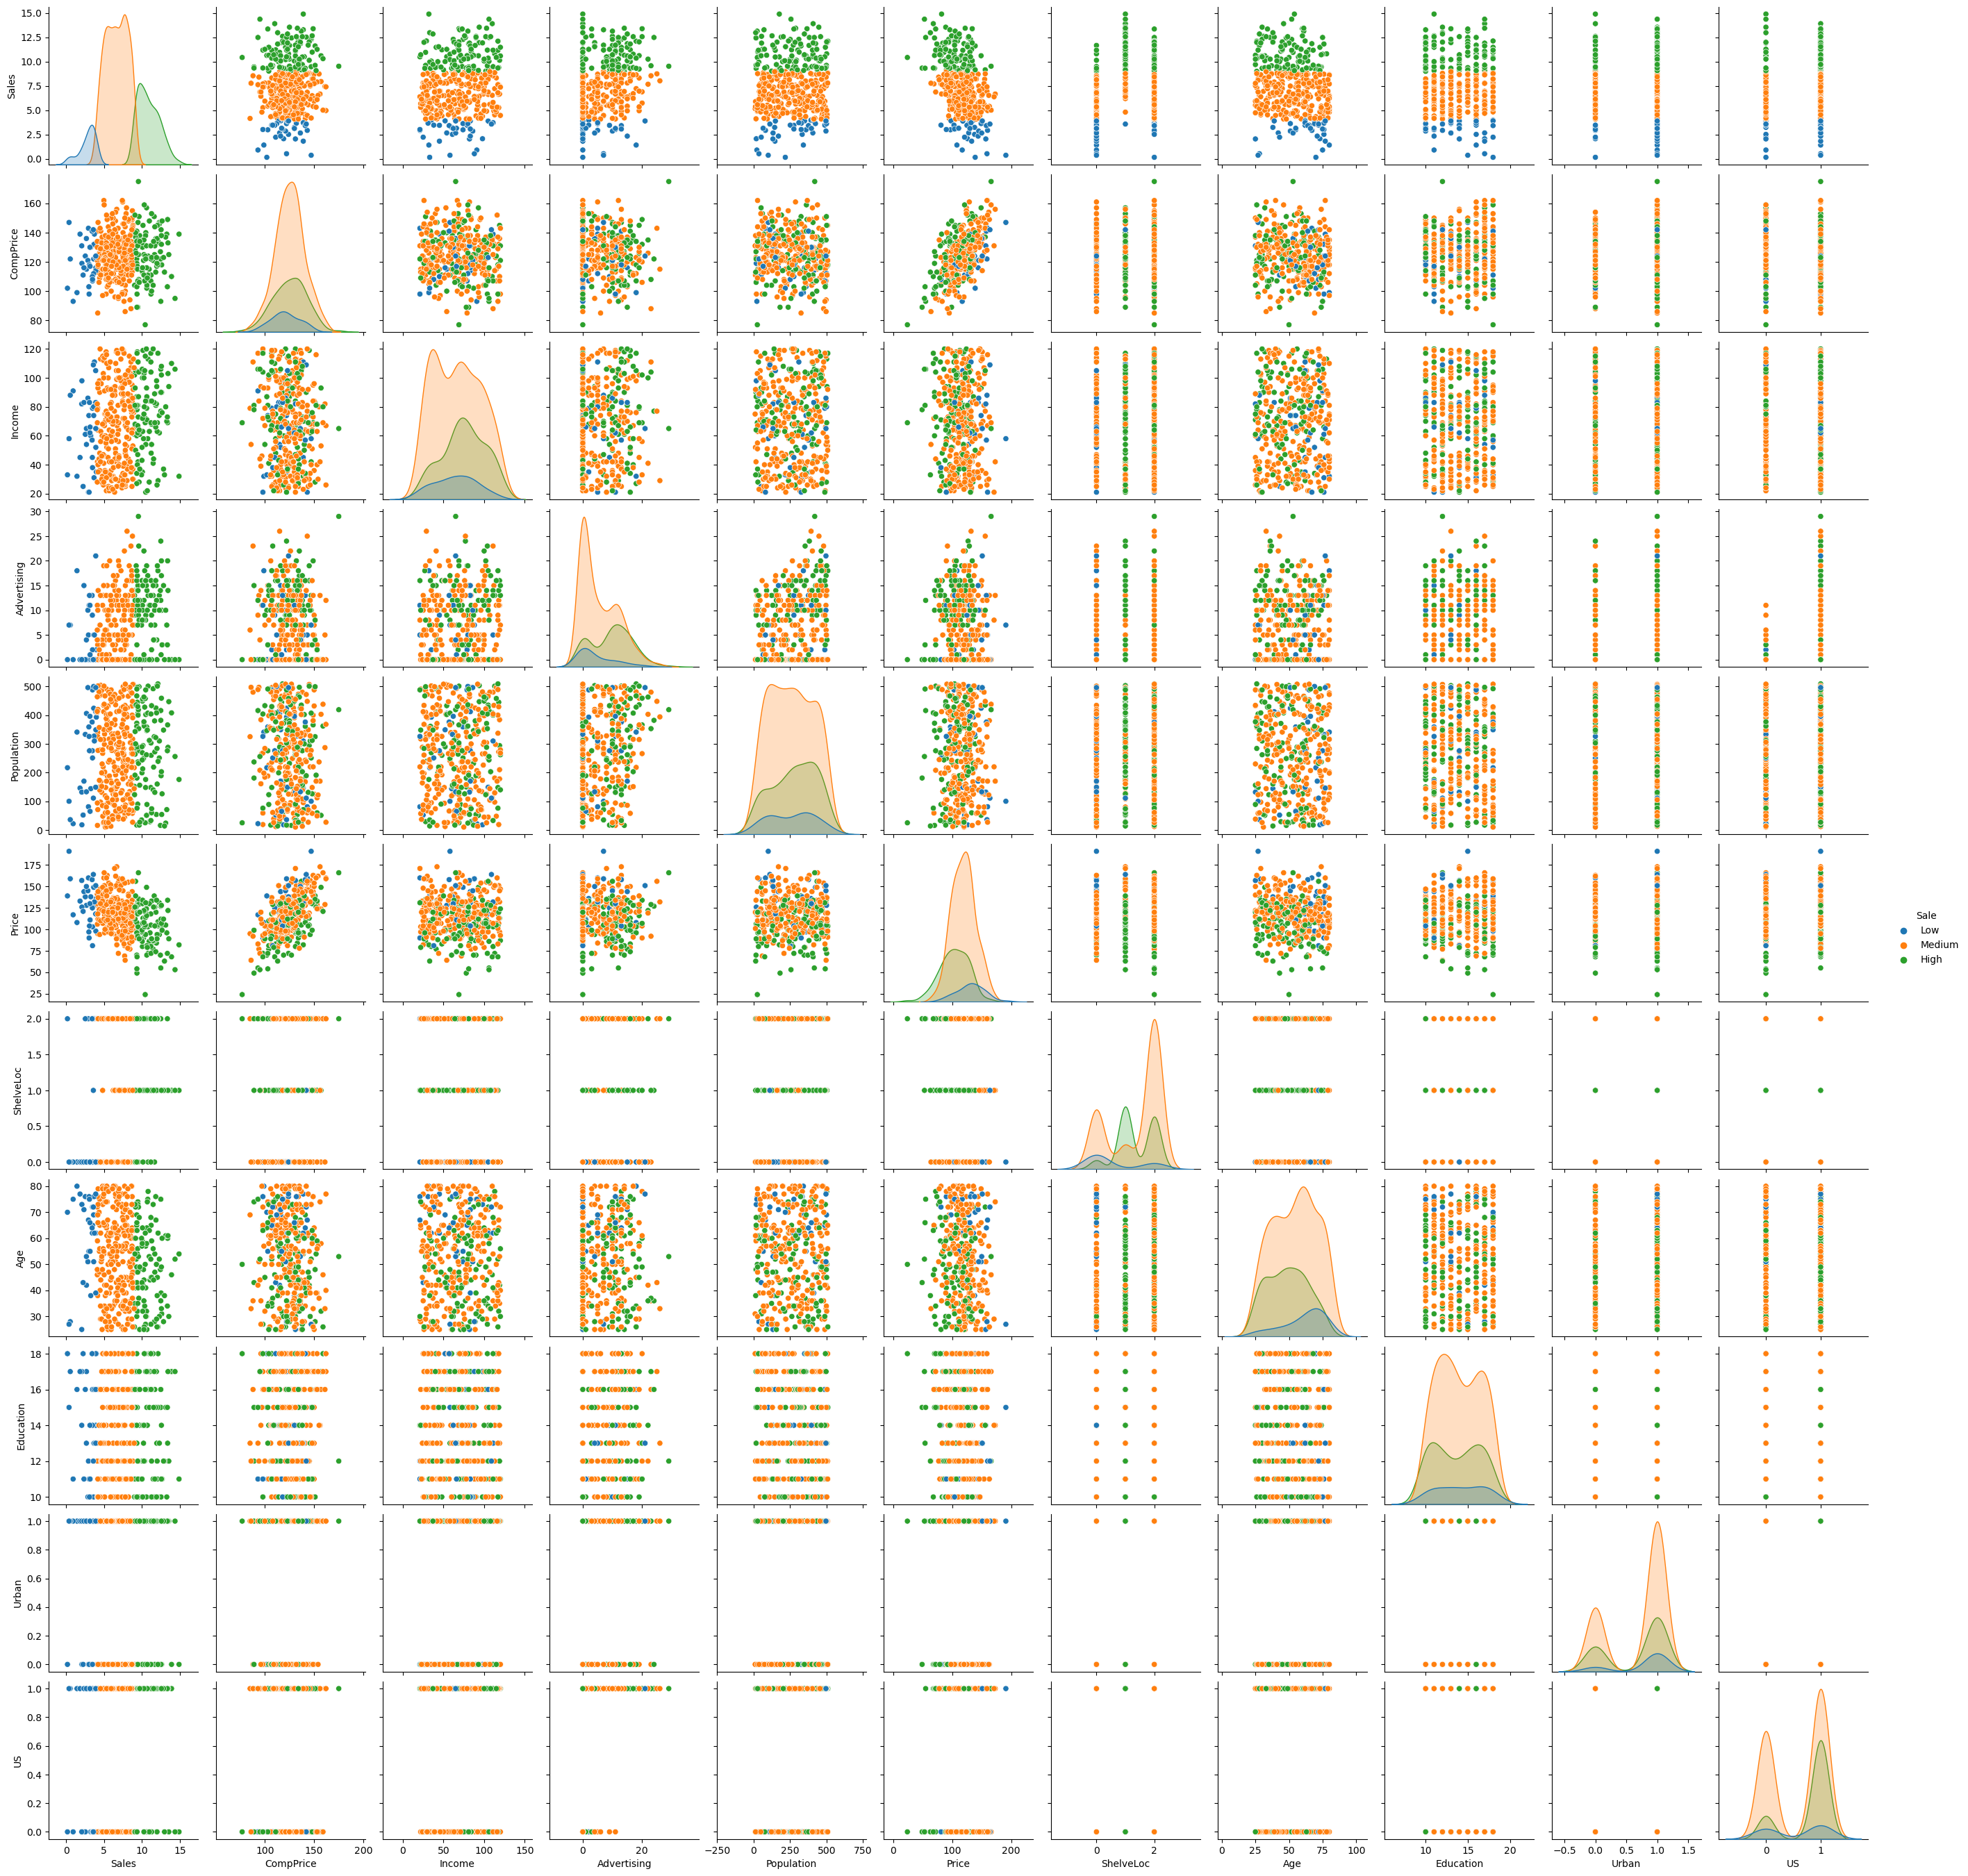

In [12]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue = "Sale")
plt.show()

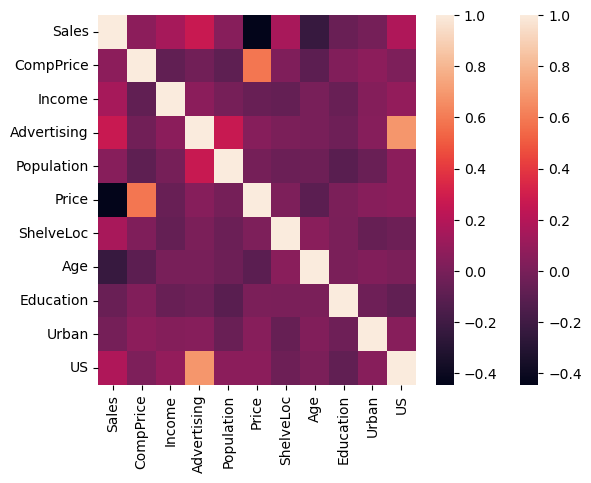

In [14]:
# correlation matrix
sns.heatmap(data.corr())
plt.show()

In [15]:
target = pd.DataFrame.astype(data['Sale'], dtype="object")
df1 = data.copy()
df1 = df1.drop('Sale', axis =1)

In [16]:
# Defining the attributes
X = df1

In [17]:
target = target.fillna('').apply(str)
target

0        High
1        High
2        High
3      Medium
4      Medium
        ...  
395      High
396    Medium
397    Medium
398    Medium
399      High
Name: Sale, Length: 400, dtype: object

In [18]:
#label encoding
target = le.fit_transform(target)
target

array([1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 2, 1, 1, 3, 3, 1, 1, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3, 2, 2, 3, 1, 3,
       3, 3, 1, 3, 2, 1, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3,
       1, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 2, 1, 3, 1, 1, 1, 3, 3,
       3, 3, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 3, 3, 1, 3, 1, 1, 3, 0, 3,
       3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 2, 3, 3, 1, 1,
       1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 2, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 2, 1, 1, 3,

In [19]:
y = target

In [20]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state =25)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (320, 11)
Testing split input-  (80, 11)


In [21]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [22]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
#print("Classification report - \n", classification_report(y_test,y_pred))

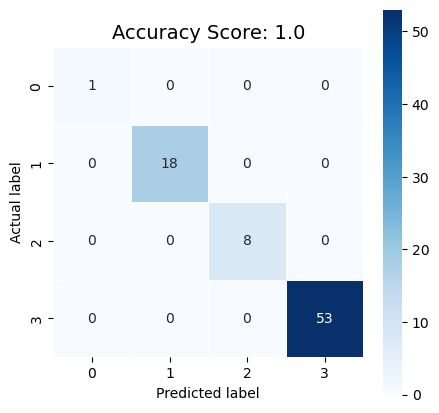

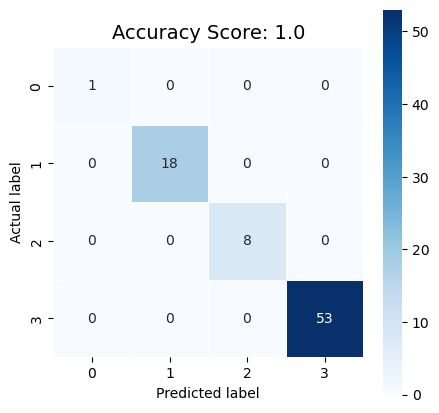

In [26]:
#2 Way table to understand the correct and wrong  predictions

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 14)
plt.show()

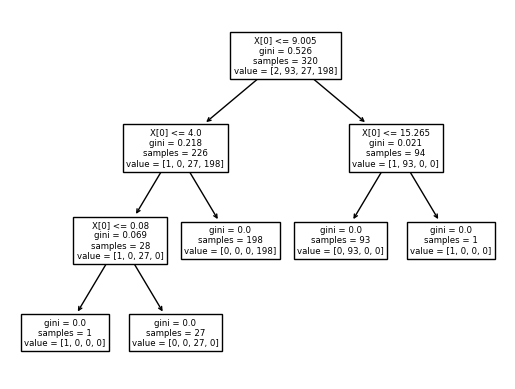

In [28]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(dtree);
plt.show()

In [29]:
#Building Decision Tree Classifier using Entropy Criteria

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [31]:
 #Predicting the values of test data
y_pred1 = model.predict(X_test)

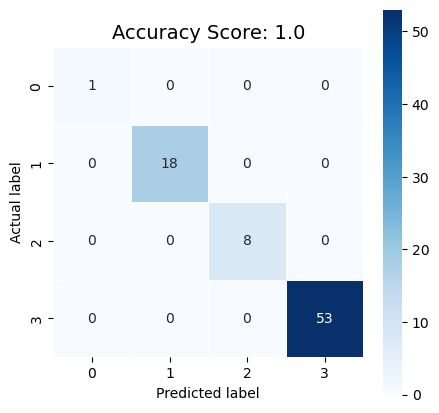

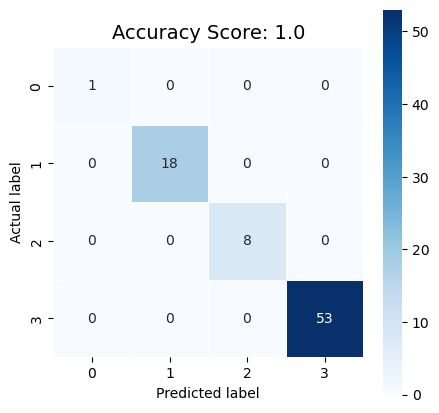

In [33]:
#2 Way table to understand the correct and wrong  predictions

cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 14)
plt.show()

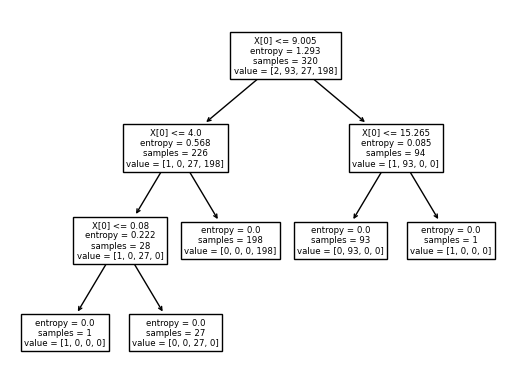

In [35]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);
plt.show()

In [36]:
#Decision Tree Regression Example
from sklearn.tree import  DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
#Find the accuracy
model1.score(X_test,y_test)

1.0

In [38]:
#Building Decision Tree Classifier (CART) using Gini Criteria
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [39]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(pred==y_test)

1.0